# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

<a id="instructions"></a>

<hr style="height:2pt">

### INSTRUCTIONS


- To submit your assignment follow the instructions given in Canvas.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code continues to work, restart the kernel and rerun the notebook periodically while working through this assignment. 

- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. **Please use only the libraries provided in those imports.**

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that clearly labels the output, includes a reference to the calculated value, and rounds it to a reasonable number of digits. **Do not hard code values in your printed output**. For example, this is an appropriate print statement:
```python
print(f'The R^2 is {R:.4f}')
```
- **Your plots MUST be clearly labeled and easy to read,** including clear labels for the $x$ and $y$ axes, a descriptive title ("MSE plot" is NOT a descriptive title; "95% confidence interval of coefficients of polynomial degree 5" on the other hand is descriptive), a legend when appropriate, and clearly formatted text and graphics.

<hr style="height:2pt">

In [2]:
# RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Question 7 optional imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

<a id="contents"></a>

## Notebook Contents

- [**PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com**](#part1)
  - [Part 1 Overview](#part1intro)
  - [Question 1: Exploratory data analysis (EDA) [10 pts]](#part1questions)
  - [Question 2: k-Nearest Neighbors [25 pts]](#part2questions)
  - [Question 3: Simple linear regression [25 pts]](#part3questions)
  - [Question 4 (required for 209a students, optional for others):  Linear regression with feature engineering [10 pts]](#part4questions)


- [**PART 2 [40 pts]: Analysis of publically available profiles on SimplyMarry.com**](#part2)
  - [Part 2 Overview](#part2intro)
  - [Question 5:   Investigating relationships of SimplyMarry.com reported attributes [25 pts]](#part5questions)
  - [Question 6:  Calculate the Gini coefficient [15 pts]](#part6questions)
  - [Question 7 (required for 209a students, optional for others):  Multi-linear regression [10 pts]](#part7questions)


## About this homework

This assignment is the first where we will go through the process of loading a dataset, splitting it in train and test sets, pre-processing it, and finally running models and evaluating our results.

We have two different datasets, one with car data in [**PART 1**](#part1) and another with data from an Indian matrimonial web site in [**PART 2**](#part2). Using these datasets, you will explore two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method.

**PLEASE NOTE:** [Question 4](#part4questions) and [Question 7](#part7questions) are **required for 209a students** and are **optional for 109a students**. 109a students are welcome to complete Q4 and Q7, if time permits, for your own learning experience. However, neither Q4 nor Q7 will be graded for 109a students and neither will not count toward your grade. On the otherhand, 209a students MUST complete Q4 and Q7, and both questions will be graded.

<a id="part1"></a>
    
# PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com

[Return to contents](#contents)

<a id="part1intro"></a>

## Overview

[Return to contents](#contents)

According to its website, **CarDekho.com** is India's leading car search venture. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons, as well as videos and pictures of all car brands and models available in India. Each car has a **current selling price**, which is the price for buying a used car on this site, and an **MRP**, which is the retail price of the car. These two prices differ depending on factors such as brand, make year, mileage, condition, etc.  

### Dataset 

The dataset contains 601 used cars and is available as `data/car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a used car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of the car when it was new (in lakhs). 
- **Kms_Driven** - number of kilometers

**NOTE:** 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

### Objective

Using kNN and linear regression we will predict the `Current_Selling_Price` from the other features available in this dataset.

<a id="part1questions"></a>

## <div class='exercise'><b> Question 1: Exploratory data analysis (EDA) [10 pts]</b></div>

[Return to contents](#contents)

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**

**1.1** Identify all variables in the dataset. Which ones are quantitative, and which ones are categorical? If you think any variables are categorical, briefly explain why.

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

**1.3** What is the range of kilometers that the cars have been driven?

**1.4** The goal of this part is to identify the best variable from which to predict our response variable `Current_Selling_Price`. 

- Plot a scatter plot between each predictor and our reponse variable and examine the relationship between the predictors and `Current_Selling_Price`.
- Based on the plots, which is the predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
**PLEASE NOTE:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals which clearly communicate the data (as described in the [Instructions](#instructions) at the start of this notebook). Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

## Question 1: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**
    
**1.1** Identify all variables in the dataset. Which ones are quantitative, and which ones are categorical? If you think any variables are categorical, briefly explain why.

</div>

In [3]:
pwd

'd:\\andrew\\python scripts\\cs109a intro to ds\\cs109a_hw2'

In [4]:
# your code here
csp= pd.read_csv("data/car_dekho_full.csv")
csp.head()

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


In [5]:
csp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   601 non-null    int64  
 1   Current_Selling_Price  601 non-null    float64
 2   MRP                    601 non-null    float64
 3   Kms_Driven             601 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 18.9 KB


**INTERPRETATION:**

**your answer here**

The year variable could be considered an ordinal categorical variable, or an integer, depending on how you wish to analyze and partition the data. For maximum flexibility, I will treat it as an integer, and can "group by" if needed to treat it as a categorical.  The selling price and MRP are floats; KM's driven is an integer. All three (selling price, MRP, and KM) are quantitative.

<div class='exercise-r'>  

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

</div>

In [6]:
# Be certain to name your variables mean_csp, mean_mrp, std_csp, std_mrp
# to match the variable names used in the provided print function

# your code here
mean_csp = csp.Current_Selling_Price.mean()
mean_mrp = csp.MRP.mean()
std_csp = csp.Current_Selling_Price.std()
std_mrp = csp.MRP.std()

# end your code here 

print(
    "\n"
    f"The mean Current Selling Price is {mean_csp:.4f} lakhs\n"
    f"The mean MRP is {mean_mrp:.4f} lakhs\n"
    f"The Standard Deviation of Current Selling Price is {std_csp:.4f}\n"
    f"The Standard Deviation of MRP is {std_mrp:.4f}"
)


The mean Current Selling Price is 4.3931 lakhs
The mean MRP is 6.9116 lakhs
The Standard Deviation of Current Selling Price is 4.5183
The Standard Deviation of MRP is 6.4801


<div class='exercise-r'>  

**1.3** What is the range of kilometers that the cars have been driven?

</div>

In [7]:
# your code here
print (f"The range of Kilometers driven is{csp.Kms_Driven.min(): .0f} to{csp.Kms_Driven.max(): .0f}")

The range of Kilometers driven is 500 to 213000


<div class='exercise-r'>  

**1.4** The goal of this part is to identify the best variable from which to predict our response variable `Current_Selling_Price`. 

- Plot a scatter plot between each predictor and our reponse variable and examine the relationship between the predictors and `Current_Selling_Price`.
- Based on the plots, which is the predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
**PLEASE NOTE:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals which clearly communicate the data (as described in the [Instructions](#instructions) at the start of this notebook). Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

</div>

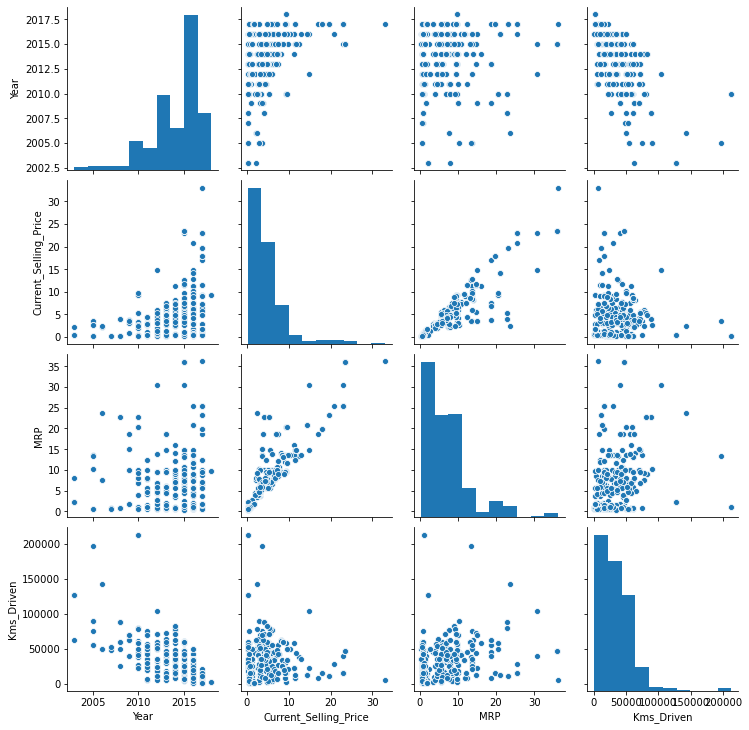

In [8]:
# your code here
sns.pairplot(csp)

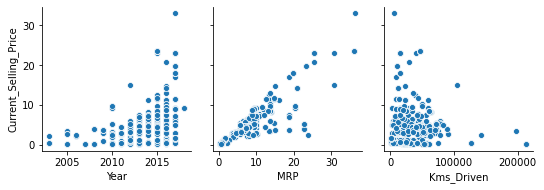

In [9]:
#Isolating predictor variables vs. response variable for closer comparison  
corr1 = sns.pairplot(data=csp,
                  y_vars=['Current_Selling_Price'],
                  x_vars=['Year', 'MRP', 'Kms_Driven'])

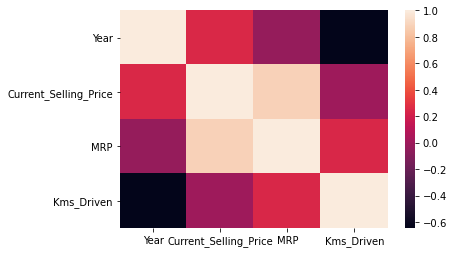

In [10]:
#Running a heat plot to visualize/inspect correlation between variables 
csp_corr = csp.corr()
sns.heatmap(csp_corr)

**INTERPRETATION:**

**your answer here**

The pairs plot shows a "linear" relationship between maximum retail price (MRP) and current selling price. This is common sense, as cars under 20 years old rarely sell for more than their brand-new retail price.

There is a looser relationship with year and KMs driven. The KMs driven alone has a weaker linear association (see the correlation plot) with the selling price than year. KMs driven likely has a strong interaction with MRP to determine selling price.

<a id="part2questions"></a>

## <div class='exercise'><b> Question 2:   k-Nearest Neighbors [25 pts]</b></div>

[Return to contents](#contents)

We begin our modeling with k-Nearest Neighbors (kNN) regression. For this, we will use `sklearn`'s built-in functions.

**2.1** Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`.

**2.2** Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization for our model.

- **2.2.1** For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor chosen in Question 1.4. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each plot of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 
- **2.2.2** Plot the training and test $MSE$ values as a function of $k$ (1 plot in total)
- **2.2.3** Find the best model based on the test $MSE$ values.
- **2.2.4** Evaluate and report the $R^2$ of the best model.


**2.3** Discuss your results by answering the following questions.  You should answer the questions directly in the provided markdown cells of your notebook.

- **2.3.1** How does the value of $k$ affect the fitted model?
- **2.3.2** If $n$ is the number of observations in the training set, what can you say about a kNN regression model that uses $k = n$?  
- **2.3.3** Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
- **2.3.4** Try rerunning the same code by changing the random seed during the train-test split (just be certain to return it to `random_state = 109` and then rerun it prior to moving on to Question 3). Do you always get the same answer? If not, why?

## Question 2: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**2.1** Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`.

</div>

In [11]:
# your code here
#x = csp[['MRP']]  # predictor chosen in problem 1.4
#y = csp['Current_Selling_Price']
train, test = train_test_split(csp, train_size=.75, random_state=109)

<div class='exercise-r'>  

**2.2** Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization for our model.
    
- **2.2.1** For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor chosen in Question 1.4. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each plot of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 

</div>

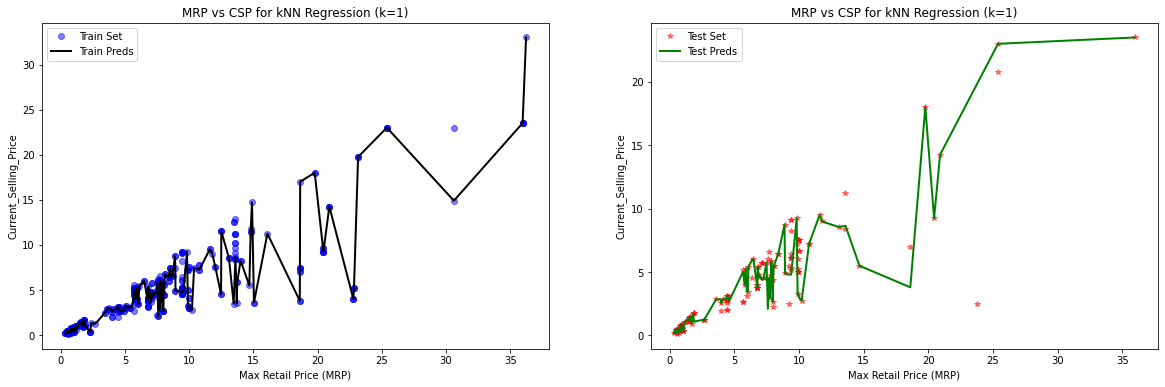

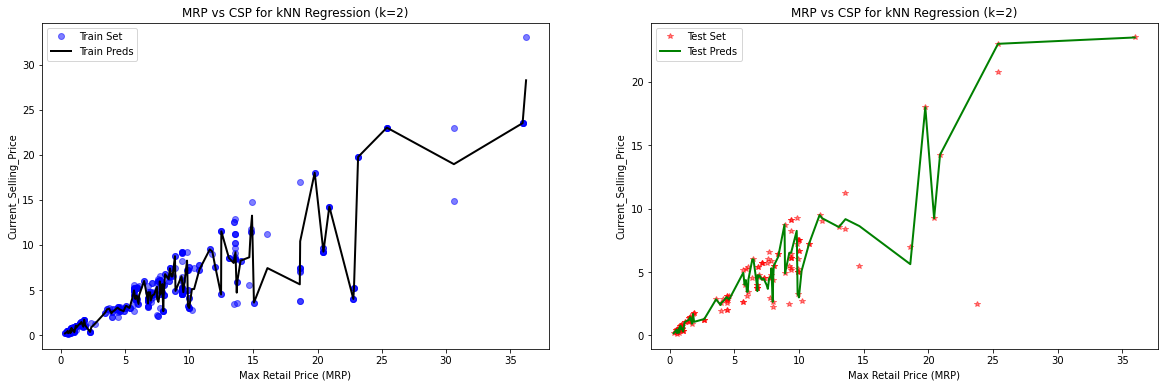

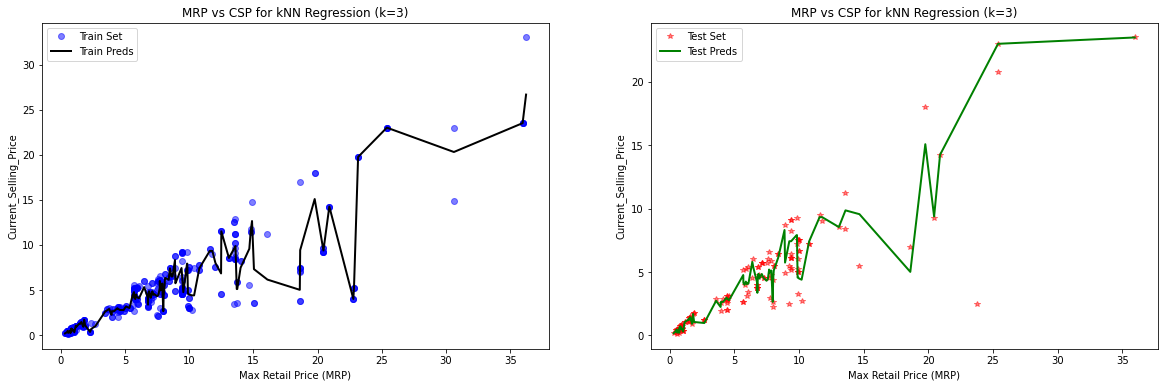

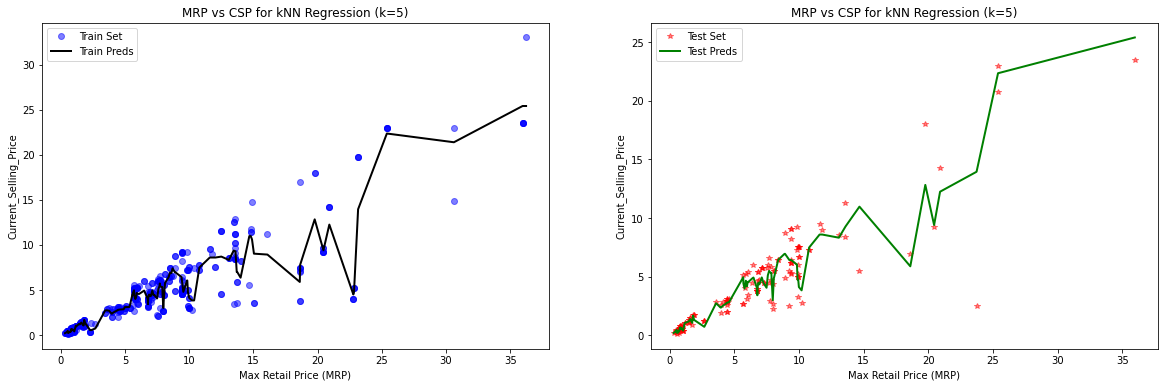

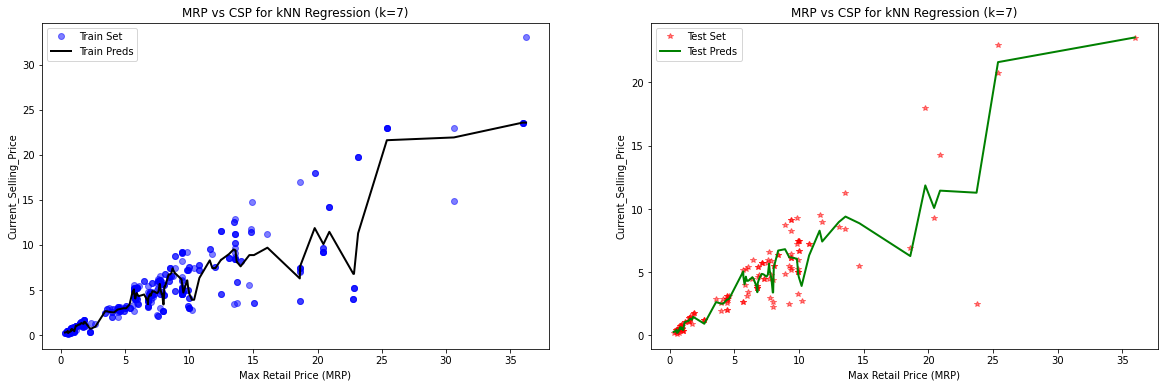

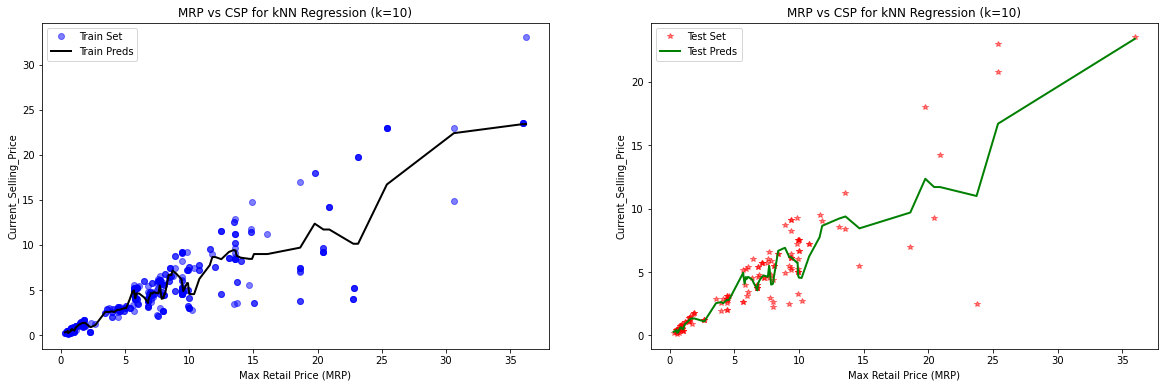

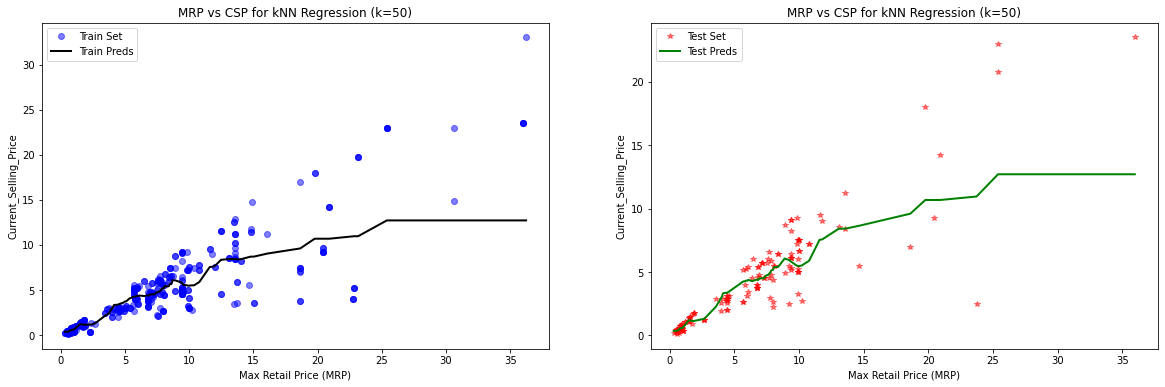

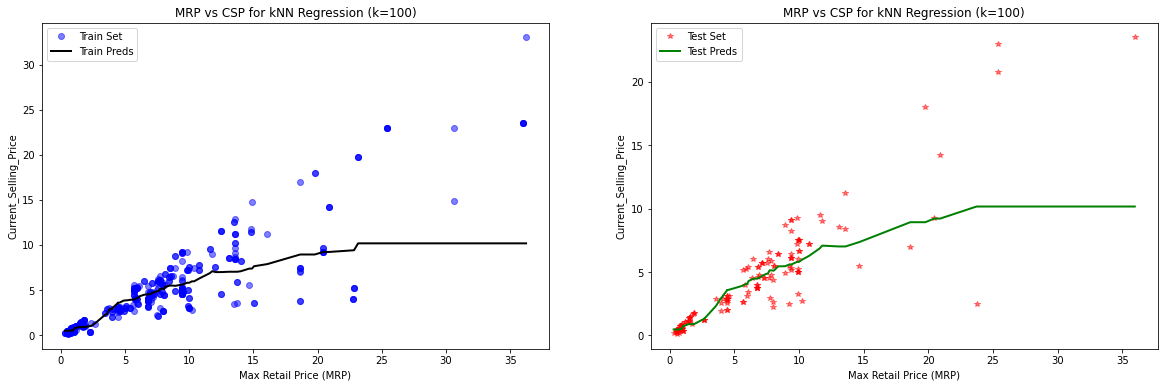

In [12]:
#fig, axs = plt.subplots(4,2, figsize=(12, 14))
#fig.subplots_adjust(hspace = .5, wspace=.3)

# your code here

def knn_model(k, train_data, test_data):
    # create the classifier object
    neighbors = KNeighborsRegressor(n_neighbors=k)

    # fit the model using x_train as training data and y_train as target values
    neighbors.fit(train_data[['MRP']], train_data['Current_Selling_Price'])

    sorted_train = train_data.sort_values(['MRP'])
    sorted_test = test_data.sort_values(['MRP'])

    # Retreieve our predictions:
    train_preds = neighbors.predict(sorted_train[['MRP']])
    test_preds = neighbors.predict(sorted_test[['MRP']])
    
    # find r^2
    r2_train = neighbors.score(train_data[['MRP']], train_data['Current_Selling_Price'])
    r2_test = neighbors.score(test_data[['MRP']], test_data['Current_Selling_Price'])
    
    #print(f'R2 training set: {r2_train:.3f} for k={k}')
    #print(f'R2 testing set: {r2_test:.3f}')
    return sorted_train, sorted_test, train_preds, test_preds, r2_train, r2_test

def plot_predictions_same_plot(k, train_data,test_data, train_preds, test_preds):
    fig, axes = plt.subplots(1, 2, figsize=(20,6))

    # train data
    
    axes[0].plot(train_data['MRP'], train_data['Current_Selling_Price'],'bo', alpha = 0.5, label = 'Train Set')
    axes[0].plot(train_data['MRP'], train_preds, 'k-', linewidth = 2, markersize = 10, label = 'Train Preds')
    axes[1].plot(test_data['MRP'], test_data['Current_Selling_Price'], 'r*', alpha = 0.5, label = 'Test Set' )
    axes[1].plot(test_data['MRP'], test_preds, 'g-', linewidth = 2, markersize = 10, label = 'Test Preds')

    for i in [0,1]:
        axes[i].set_xlabel('Max Retail Price (MRP)')
        axes[i].set_ylabel('Current_Selling_Price')
        axes[i].set_title(f'MRP vs CSP for kNN Regression (k={k})')
        axes[i].legend()
    plt.show()

    fig.suptitle('THIS', fontsize = 20)
    #plt.show()

knn_train_preds = []
knn_test_preds = []
knn_r2_train_scores = []
knn_r2_test_scores = []
sorted_train = []
sorted_test = []

k_list = [1,2,3,5,7,10,50,100]

for k in k_list:
    sim_sorted_train, sim_sorted_test, sim_train_preds, sim_test_preds, knn_r2_train, knn_r2_test = knn_model(k, train,test)
    plot_predictions_same_plot(k,sim_sorted_train, sim_sorted_test, sim_train_preds, sim_test_preds)
    knn_train_preds.append(sim_train_preds)
    knn_test_preds.append(sim_test_preds)
    knn_r2_train_scores.append(knn_r2_train)
    knn_r2_test_scores.append(knn_r2_test)
    sorted_train = sim_sorted_train
    sorted_test = sim_sorted_test

<div class='exercise-r'>  

**2.2.2** Plot the training and test $MSE$ values as a function of $k$ (1 plot in total)

</div>

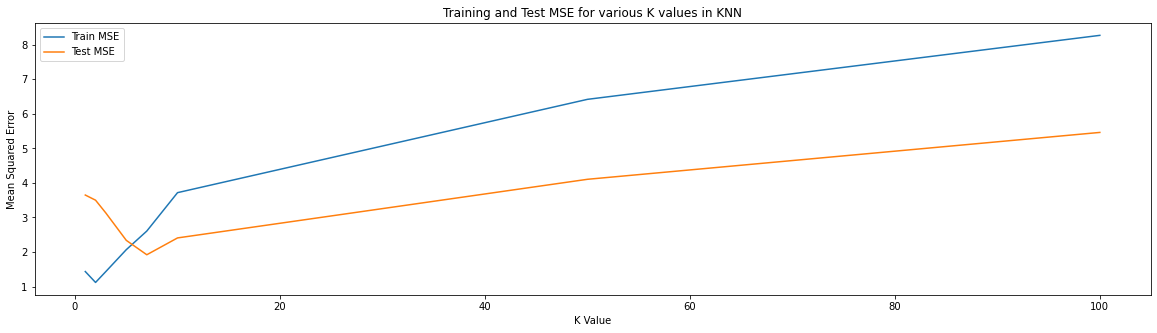

In [13]:
# your code here
knn_mse = pd.DataFrame()
for i in range(len(k_list)):
    train_mse = mean_squared_error(knn_train_preds[i],sorted_train['Current_Selling_Price'])
    test_mse = mean_squared_error(knn_test_preds[i],sorted_test['Current_Selling_Price'])
    knn_mse = knn_mse.append([[k_list[i], train_mse, test_mse]])
# rename the columns of the df for readability and easier reference
knn_mse.columns = ['K','TrainMSE', 'TestMSE']

# owing to the append method inside the loop, the rows all have index = 0. This code resets the index and 
# drops the old, all-zero index column
knn_mse.reset_index(inplace=True)
knn_mse.drop(columns=['index'], inplace=True)

fig, ax = plt.subplots(figsize=(20,5))
ax.set_xlabel('K Value')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Training and Test MSE for various K values in KNN')
ax.plot(knn_mse['K'], knn_mse['TrainMSE'], label='Train MSE')
ax.plot(knn_mse['K'], knn_mse['TestMSE'], label='Test MSE')
ax.legend();

<div class='exercise-r'>  

**2.2.3** Find the best model based on the test $MSE$ values.

</div>

In [14]:
# your code here
best_mse = knn_mse.loc[knn_mse['TestMSE'].idxmin()]
print(f"The best MSE score of{best_mse['TestMSE']: .4f} came from knn model with k={best_mse['K']}")

The best MSE score of 1.9219 came from knn model with k=7.0


<div class='exercise-r'>  

**2.2.4** Evaluate and report the $R^2$ of the best model.

</div>

In [15]:
# your code here
# max R2 score
max_r2 = max(knn_r2_test_scores)

# get the index in the list of the best R2 score
best_r2_index = knn_r2_test_scores.index(max(knn_r2_test_scores))

# find k-value that provided best R2
best_k = k_list[best_r2_index]

print(f"The best R^2 score of{max_r2: .4f} came from knn model with k={best_k}")

The best R^2 score of 0.8807 came from knn model with k=7


<div class='exercise-r'>  

**2.3** Discuss your results by answering the following questions.  You should answer the questions directly in the provided markdown cells of your notebook.

**2.3.1** How does the value of $k$ affect the fitted model?

</div>

**your answer here**
As k increases from 1, the model fit improves, until it reaches k=7. Moving towards higher values of k, the model fit worsens, because higer values of k provide a sub-optimal balance between bias and variance when compared to k=7; depicted by increased MSE values.  Specifically, as k increases past the optimum level, the model becomes less flexible, corresponding to lower variance but higher bias.  


<div class='exercise-r'>  

**2.3.2** If $n$ is the number of observations in the training set, what can you say about a kNN regression model that uses $k = n$?

</div>

**your answer here**

A model using k=n would be the mean of the response/outcome variable in the training dataset ($\hat{y}_{train}$).  This would produce a model that lacks predictive use (high MSE); as there would be low variance but very high bias.  

<div class='exercise-r'>  

**2.3.3** Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.

</div>

**your answer here**
There are differences in the MSE of the training and test datasets. This may be due to the specific random selection of this specific data, and likely will differ for different train-test splits.  The training error rate generally increases as k-values also increase (decreased flexibility increases training MSE), but this is not the case with the test error rate.  As the k-values increase, the model becomes less flexbible and the test error rate exhibits a U-shape, declining at first until the optimum is reached at k=7, before increasing again as the model begins to overfit.    

<div class='exercise-r'>  

**2.3.4** Try rerunning the same code by changing the random seed during the train-test split (just be certain to return it to `random_state = 109` and then rerun it prior to moving on to Question 3). Do you always get the same answer? If not, why?

</div>

 **your answer here**
Changing the random state definitely produces different minimum K values. Our hypothesis in 2.3.3 was correct. Random state=19 yields k=1, random_state=1009 yields k=3.  A train-test split occurs randomly and will assign different data to the train and test sets each time the operation is performed.  In order to ensure reproducibility of our results, we control the random factor by setting a random seed--which will ensure that the same data is continuously assigned to the training and test sets.    

<a id="part3questions"></a>

## <div class='exercise'><b>Question 3:  Simple linear regression [25 pts]</b></div>

[Return to contents](#contents)

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression. You will use the same 75% training and 25% testing split of the data, using the same `random_state = 109`.

- **3.1.1** Run a linear regression model.
- **3.1.2** Report the slope/coefficient and intercept values for the fitted linear model.
- **3.1.3** Report the $MSE$ for the training and test sets and the $R^2$ for the test set.
- **3.1.4** Plot the **residuals**, $e = y - \hat{y}$, of the model on the training set as a function of the **response** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.

**NOTE:** Use the `sklearn` module for linear regression. Instantiate a `LinearRegression` model object, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
    
**3.2** Discuss your results by answering the following questions.  

- **3.2.1** How does the test $MSE$ score compare with the best test $MSE$ value obtained with kNN regression? 

- **3.2.2** What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

- **3.2.3** Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.

## Question 3: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression. You will use the same 75% training and 25% testing split of the data, using the same `random_state = 109`.

**3.1.1** Run a linear regression model.

- **NOTE:** Use the `sklearn` module for linear regression. Instantiate a `LinearRegression` model object, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions.

</div>

In [16]:
# your code here
linreg = LinearRegression().fit(train[['MRP']], train['Current_Selling_Price'])
y_preds_train = linreg.predict(train[['MRP']])
y_preds_test = linreg.predict(test[['MRP']])

<div class='exercise-r'>  

**3.1.2** Report the slope/coefficient and intercept values for the fitted linear model.

</div>

In [17]:
# your code here
print('Coefficient:', linreg.coef_)
print('Intercept:', linreg.intercept_)

Coefficient: [0.61565992]
Intercept: 0.11236987692104616


<div class='exercise-r'>  

**3.1.3** Report the $MSE$ for the training and test sets and the $R^2$ for the test set.

</div>

In [18]:
# your code here 
print('MSE for training dataset:', mean_squared_error(train['Current_Selling_Price'], y_preds_train))
print('MSE for test dataset:', mean_squared_error(test['Current_Selling_Price'], y_preds_test))
print('R2 score on test dataset:', linreg.score(test[['MRP']], test['Current_Selling_Price']))

MSE for training dataset: 4.713332797955166
MSE for test dataset: 3.1361670521741685
R2 score on test dataset: 0.8052856808135864


<div class='exercise-r'>  

**3.1.4** Plot the **residuals**, $e = y - \hat{y}$, of the model on the training set as a function of the **response** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.

</div>

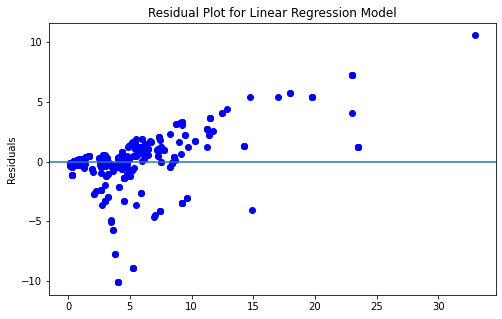

In [19]:
# your code here 
residuals = train['Current_Selling_Price']-y_preds_train
fig, axes = plt.subplots(1,1,figsize=(8,5))
plt.scatter(train['Current_Selling_Price'], residuals, color='blue')
plt.axhline()
plt.title("Residual Plot for Linear Regression Model")
plt.ylabel('Residuals');

<div class='exercise-r'>  

**3.2** Discuss your results by answering the following questions.

**3.2.1** How does the test $MSE$ score compare with the best test $MSE$ value obtained with kNN regression?

</div>

**your answer here**
The best test MSE from our kNN is 1.9 and our R^2 is 0.88.  The linear regression has an MSE of 3.1 and a R^2 of 0.81. The linear regression performs worse than the kNN model.  In realistic terms, linear regression models perform worse when the relationship between the predictor variable(s) and the response variable are not entirely linear.  In our case, we can conclude from the plots and the MSEs (kNN vs. LR), that the relationship (f(x)) is not entirely linear.  

<div class='exercise-r'>  

**3.2.2** What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

</div>

**your answer here**
The coefficient is positive, which means that as MRP increases, the current selling price increases.  Specifically, the positive slope indicates the predicted rise in current_selling_price (y-value) for every one lakh increase in MRP (x-value).  

<div class='exercise-r'>  

**3.2.3** Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.

</div>

**your answer here**
The residuals plot does show that the assumption of linearity is valid for this data, but violates the assumption of heteroskedasticity.  The variance increases greatly as the y-values increase.  I would content that because the residuals do not appear to be randomly dispersed along the horizontal axis, the asummption of linearity is not valid.  The residuals are clustered towards the left-of-center on the horizontal axis and there appears to be an inverted U shape with the remaining residuals.   This would imply that linear regression is not the best model for this dataset, i.e., this model will not perform as well as kNN when predicting the current_selling_price.     

<a id="part4questions"></a>

## <div class='exercise'><b>Question 4 (required for 209a students, optional for others):  Linear regression with feature engineering [10 pts]</b></div>

[Return to contents](#contents)

**4.1** Creating a new variable from existing data: **percentage depreciation**

Feature engineering involves transforming data into features that better represent the underlying problem for a predictive model. This typically results in improved model accuracy on unseen data. 

Our previous regression model explores the relationship between `Current_Selling_Price` (CSP) and `MRP`.

$$CSP = \beta_0 + \beta_1 \cdot MRP$$

However, this linear equation does not incorparate other interesting variables such as the year of manufacture (`Year`), or the kilometers driven (`Kms_Driven`), which may be important factors that affect the current value of the car.

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the "percentage depreciation" of the current selling price to the MRP as follows:

$$\textrm{Percentage of the Selling Price} = perc =\frac{MRP - CSP}{MRP}$$
    
Create a new column in your dataframe with each car's `perc` value.

    
**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs and including the required interpretation:

- **4.2.1** It was seen previously that there is a relationship between `Year` and `Current_Selling_Price`. Is the relationship between `Year` and `perc` the same. If not, how has it changed and why do you think so?

- **4.2.2** Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current_Selling_Price`?

- **4.2.3** Does there seem to be a relationship between `Kms_Driven` and `perc`? 

- **4.2.4** Which is the best predictor to predict `perc` (if there is one)? Is it the same as that of `Current_Selling_price` or has it changed?


**4.3** Fitting a Linear Regression model

Based on your EDA choose appropriate **predictor** variables for `perc` as your **response** variable. Use the same split train-test sets with training data of 75% and testing data of 25%.

- Fit a separate Linear Regression model for each of the predictors.
- Plot each linear model with the training and test data (in different colors with clear legends)
- Report the $MSE$ score from the training and test sets for each model.
- Find the best model (i.e. the best predictor) based on the $MSE$ of each model.


**4.4** You have now established a good linear model for **response** `perc`. At the same time, you also know the relationship between `perc` and `Current_Selling_Price`, which is the **response** that we ultimately want to model. Combining the two pieces of knowledge, what linear model can you build to model `Current_Selling_Price` directly with the predictor that models `perc` the best? Build that model and inspect the $R^2$ score of the new model on `Current_Selling_Price`. Explain the approach you have chosen to take (be explicit in your description). Is the new model better than the model you had built in [Question 3](#part3questions)?

## Question 4: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**4.1** Creating a new variable from existing data: **percentage depreciation**

Feature engineering involves transforming data into features that better represent the underlying problem for a predictive model. This typically results in improved model accuracy on unseen data. 

Our previous regression model explores the relationship between `Current_Selling_Price` (CSP) and `MRP`.

$$CSP = \beta_0 + \beta_1 \cdot MRP$$

However, this linear equation does not incorparate other interesting variables such as the year of manufacture (`Year`), or the kilometers driven (`Kms_Driven`), which may be important factors that affect the current value of the car.

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the "percentage depreciation" of the current selling price to the MRP as follows:

$$\textrm{Percentage of the Selling Price} = perc =\frac{MRP - CSP}{MRP}$$
    
Create a new column in your dataframe with each car's `perc` value.

</div>

In [20]:
# your code here
csp['perc'] = (csp['MRP']-csp['Current_Selling_Price'])/csp['MRP']
csp.head()

,Year,Current_Selling_Price,MRP,Kms_Driven,perc
0,2016,5.25,5.70,3493,0.079
1,2005,3.51,13.70,75000,0.744
2,2010,0.31,1.05,213000,0.705
3,2006,2.10,7.60,50456,0.724
4,2005,0.20,0.57,55000,0.649


<div class='exercise-r'>  

**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs and including the required interpretation:

**4.2.1** It was seen previously that there is a relationship between `Year` and `Current_Selling_Price`. Is the relationship between `Year` and `perc` the same. If not, how has it changed and why do you think so?

</div>

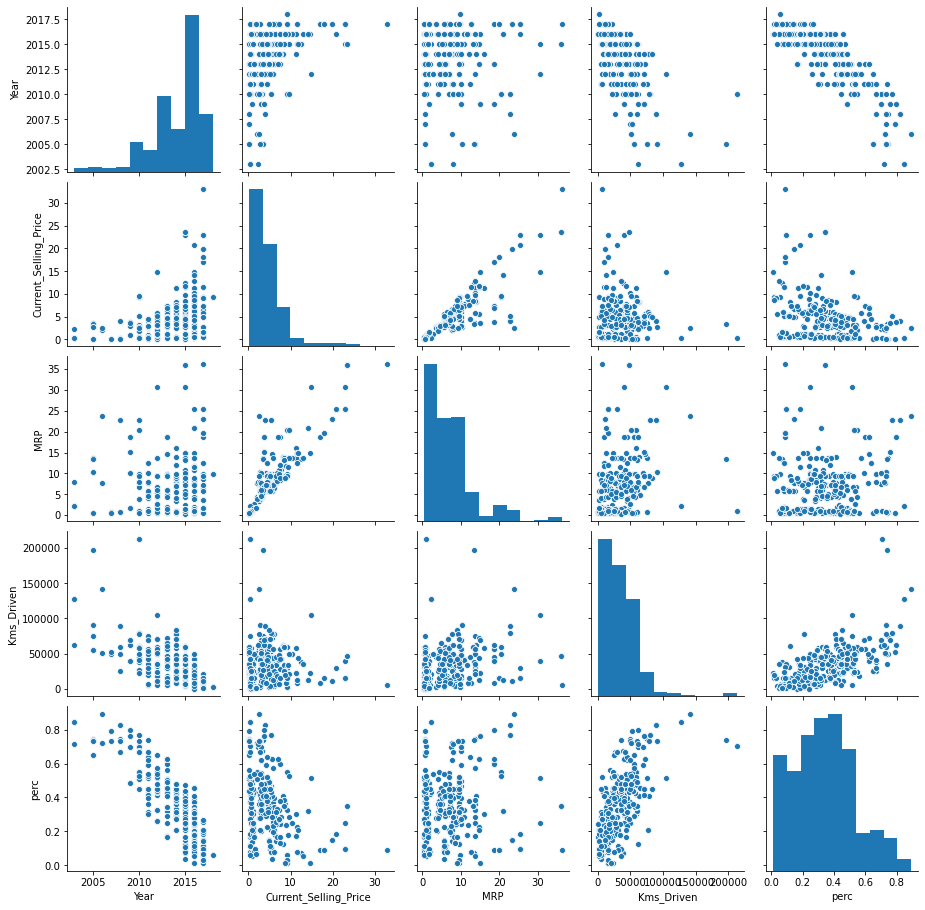

In [21]:
# your code here
sns.pairplot(csp)
plt.show()

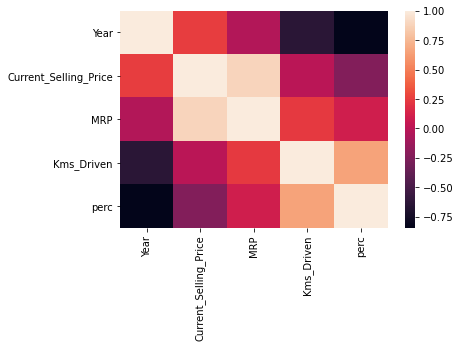

In [22]:
csp_corr = csp.corr()
sns.heatmap(csp_corr)
plt.show()

**INTERPRETATION:**

**your answer here**


The correlation between year and perc is much greater than year and current selling price. Following the common pattern of car value depreciation, the fraction of their new retail price is smaller for older cars than newer cars are. In this way, information about the age (model year) of the car compared to the current price (as of the snapshot time when the data was collected) is encoded in perc.

<div class='exercise-r'>  

**4.2.2** Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current_Selling_Price`?

</div>

In [23]:
# your code here
csp_corr

,Year,Current_Selling_Price,MRP,Kms_Driven,perc
Year,1.000,2.503e-01,-0.033,-6.441e-01,-0.846
Current_Selling_Price,0.250,1.000e+00,0.888,6.208e-04,-0.239
MRP,-0.033,8.878e-01,1.000,2.423e-01,0.105
Kms_Driven,-0.644,6.208e-04,0.242,1.000e+00,0.654
perc,-0.846,-2.394e-01,0.105,6.541e-01,1.000


**INTERPRETATION:**

**your answer here**

Given the correlation between MRP and perc is 0.105, and the correlation between MRP and CSP is 0.888, the trend for both is still positive, albeit with vastly different magnitudes


<div class='exercise-r'>  

**4.2.3** Does there seem to be a relationship between `Kms_Driven` and `perc`? 

</div>

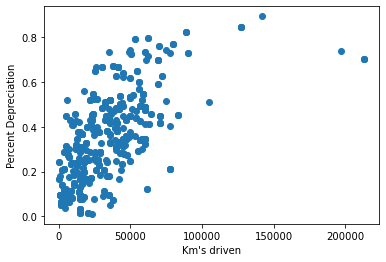

In [24]:
# your code here
plt.scatter(csp['Kms_Driven'], csp['perc'])
plt.xlabel("Km's driven")
plt.ylabel("Percent Depreciation")
plt.show()

**INTERPRETATION:**

**your answer here**

There is a correlation of 0.65 between Kms_Driven and perc. This follows the general logic that older cars have been driven more.

<div class='exercise-r'>  

**4.2.4** Which is the best predictor to predict `perc` (if there is one)? Is it the same as that of `Current_Selling_price` or has it changed? 

</div>

**your answer here**

The best predictor of perc would be Year.

<div class='exercise-r'>  

**4.3** Fitting a Linear Regression model

Based on your EDA choose appropriate **predictor** variables for `perc` as your **response** variable. Use the same split train-test sets with training data of 75% and testing data of 25%.

- Fit a separate Linear Regression model for each of the predictors.
- Plot each linear model with the training and test data (in different colors with clear legends)
- Report the $MSE$ score from the training and test sets for each model.
- Find the best model (i.e. the best predictor) based on the $MSE$ of each model.

</div>

Coefficient: [0.00324779]
Intercept: 0.3248648730132904
MSE for training dataset: 34.05310420252337
MSE for test dataset: 25.655847414881382
R2 score on test dataset: 0.004150813568683964


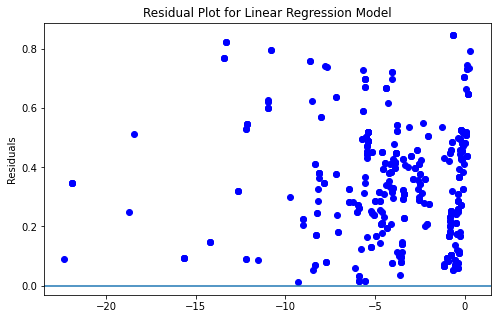

In [25]:
# your code here
train1, test1 = train_test_split(csp, train_size=.75, random_state=109)
linreg1 = LinearRegression().fit(train1[['MRP']], train1['perc'])
y_preds_train1 = linreg.predict(train1[['MRP']])
y_preds_test1 = linreg.predict(test1[['MRP']])
print('Coefficient:', linreg1.coef_)
print('Intercept:', linreg1.intercept_)
print('MSE for training dataset:', mean_squared_error(train1['perc'], y_preds_train1))
print('MSE for test dataset:', mean_squared_error(test1['perc'], y_preds_test1))
print('R2 score on test dataset:', linreg1.score(test1[['MRP']], test1['perc']))
residuals1 = train1['perc']-y_preds_train1
fig, axes = plt.subplots(1,1,figsize=(8,5))
plt.scatter(residuals1, train1['perc'], color='blue')
plt.axhline()
plt.title("Residual Plot for Linear Regression Model")
plt.ylabel('Residuals');

**INTERPRETATION:**

**your answer here**


<div class='exercise-r'>  

**4.4** You have now established a good linear model for **response** `perc`. At the same time, you also know the relationship between `perc` and `Current_Selling_Price`, which is the **response** that we ultimately want to model. Combining the two pieces of knowledge, what linear model can you build to model `Current_Selling_Price` directly with the predictor that models `perc` the best? Build that model and inspect the $R^2$ score of the new model on `Current_Selling_Price`. Explain the approach you have chosen to take (be explicit in your description). Is the new model better than the model you had built in [Question 3](#part3questions)?

</div>

In [26]:
# your code here


**INTERPRETATION:**

**your answer here**


<a id="part2"></a>
    
# PART 2 [40 pts]: Analysis of publically available profiles on SimplyMarry.com

[Return to contents](#contents)

<a id="part2intro"></a>

## Overview

[Return to contents](#contents)

In this part we analyze data from publically available [profiles on SimplyMarry.com](https://en.wikipedia.org/wiki/SimplyMarry), an Indian matrimonial matching portal that was closed in 2017. We will use this data to investigate relationships among various attributes reported in user profiles and examine trends embedded in this data that relate user-reported income.

### Dataset

The SimplyMarry.com data is aggregated in the file named `data/Income_prediction.csv`. All attributes in this dataset refer to traits and preferences of users looking for a spouse on SimplyMarry.com. The attributes that refer specifically to preferences, rather than traits, are clarified in the list below. 

- **age** - Age of person looking for a spouse
- **gender** - {'Female': 0, 'Male': 1} 
- **height** - Height in inches
- **bmi** - Body mass index (BMI) calculated based on height and weight
- **eating** - {'No Restrictions': 0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - Family living arrangement preference of the person looking for a spouse ('Doesn't Matter': 0, 'Other': 3, 'Nuclear': 1, 'Joint family': 2}
- **status** - Social status preference of the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Prefers Not To Respond': 0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish ': 3, 'Wheatish Medium ': 4, 'Dark': 5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School': 0, 'Some college': 1, 'Undergrad': 2, 'Grad': 3, 'Doctorate': 4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi': 3, 'Kolkata': 4, 'Bengaluru': 5, 'Chennai': 6, 'Hyderabad': 7, 'Pune': 8, 'Ahmedabad': 9, 'Surat': 10, 'Vishakapatnam': 11, 'Others': 12)
- **income** - Annual income in dollars

**NOTE:** Within the **family_type** attribute, the 'Joint family' category denoted by a value of 2 comprises several more granular joint-family options not shown here. Those various types of joint family arrangements include 'Joint family both parents', 'Joint family only mother', 'Joint family father mother and brothers sisters', 'Joint family single parent brothers and or sisters', and 'Joint family only father', each of which has simply been aggregated under 'Joint family' in our dataset.

*Source: Harvard IACS*

### Disclaimer

This dataset is several years old and representative of profiles from a site that no longer exists. Some attributes represented in this dataset are particularly challenging to approach even with far more sophisticated analyses and nuanced considerations than we will be applying in this assignment. Extremely simple, reductive analysis on sensitive topics such as these can sometimes do more harm than good. For those reasons, please be cognizant not to draw pontentially harmful generalizations from any results or findings you generate below. We will be exploring ethics and the potential harms of biases and generalizations in data science in greater depth as we continue throughout this semester.

<a id="part5questions"></a>

## <div class='exercise'><b>Question 5: Investigating relationships of SimplyMarry.com reported attributes [25 pts]</b></div>

[Return to contents](#contents)

First we are going to use simple analytics to learn more about the relationships of different attributes in this dataset. The idea is to use basic modeling based on averages and sample distributions to uncover potential relationships in the data.

Here we will answer the below questions using plots and simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate findings more clearly.

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? Is it possible to consider skin complexion as an ordinal variable? For instance, consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order. 

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

**5.4** Is there a clear trend between BMI and income?

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the gender variable available in this dataset?

**5.6** Do any of the quantitative attributes show a clear linear or non-linear association with income?

**5.7** Is income lower or higher for those living in "nuclear" families?

**5.8** What is the average effect of the "Manglik" variable on income?


## Question 5: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

First we are going to use simple analytics to learn more about the relationships of different attributes in this dataset. The idea is to use basic modeling based on averages and sample distributions to uncover potential relationships in the data.

Here we will answer the below questions using plots and simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate findings more clearly.

</div>

In [27]:
# your code here 
sm = pd.read_csv('data/Income_prediction.csv')
sm.head()

,age,gender,height,bmi,eating,family_type,status,manglik,drinking,complexion,body,education,city,income
0,25,1,62,20.161,4,2,1,0,1,2,1,0,12,2500
1,28,0,66,22.062,2,2,2,2,1,2,2,2,8,7500
2,31,1,68,19.107,2,1,1,1,1,2,2,2,8,7500
3,30,1,69,23.441,2,1,1,1,1,2,1,2,8,7500
4,34,0,63,22.651,4,1,1,0,1,2,2,2,10,4167


In [28]:
print(sm.info())
cat_type = pd.api.types.CategoricalDtype(ordered=False)
cat_vars = ['gender', 'eating', 'family_type', 'status', 'drinking', 'complexion', 'body', 'education', 'city', 'manglik']
for var in cat_vars:
    sm[var] = sm[var].astype(cat_type)
print(sm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12355 entries, 0 to 12354
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          12355 non-null  int64  
 1   gender       12355 non-null  int64  
 2   height       12355 non-null  int64  
 3   bmi          12355 non-null  float64
 4   eating       12355 non-null  int64  
 5   family_type  12355 non-null  int64  
 6   status       12355 non-null  int64  
 7   manglik      12355 non-null  int64  
 8   drinking     12355 non-null  int64  
 9   complexion   12355 non-null  int64  
 10  body         12355 non-null  int64  
 11  education    12355 non-null  int64  
 12  city         12355 non-null  int64  
 13  income       12355 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 1.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12355 entries, 0 to 12354
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------

In [29]:
#converting income to log format for subsequent calculations
sm['logincome'] = np.log(sm['income'])

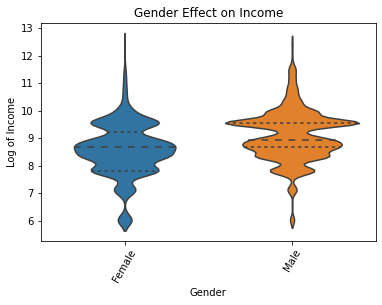

In [30]:
ax = sns.violinplot(x=sm['gender'],y=sm['logincome'], inner="quartile")
ax.set(xlabel='Gender')
ax.set(ylabel='Log of Income')
ax.set_title('Gender Effect on Income')
ax.set_xticklabels(['Female', 'Male']) #can add ',rotation=n' here because I'm using xtick labels
plt.xticks(rotation=60)  # generic code using matplotlib to add text rotation w/o dependency on use of labels for xticklabels
plt.show();


**INTERPRETATION:**

**your answer here**

The income for males does appear to be slightly higher than females. Whether this is a significant effect in a predictive model remains to be seen.


<div class='exercise-r'>  

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? Is it possible to consider skin complexion as an ordinal variable? For instance, consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order.

</div>

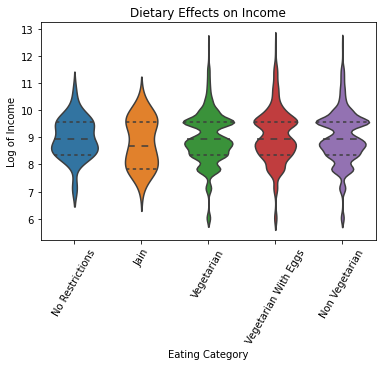

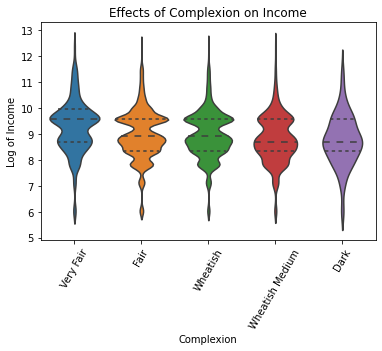

In [31]:
# your code here 

# Could arrange this as two plots on one line instead of two separate plots

ax = sns.violinplot(x=sm['eating'],y=sm['logincome'], inner="quartile")
ax.set(xlabel='Eating Category')
ax.set(ylabel='Log of Income')
ax.set_xticklabels(['No Restrictions', 'Jain', 'Vegetarian', 'Vegetarian With Eggs', 'Non Vegetarian']) #can add ',rotation=n' here because I'm using xtick labels
plt.xticks(rotation=60)  # generic code using matplotlib to add text rotation w/o dependency on use of labels for xticklabels
ax.set_title('Dietary Effects on Income')
plt.show()
ax = sns.violinplot(x=sm['complexion'],y=sm['logincome'], inner="quartile")
ax.set(xlabel='Complexion')
ax.set(ylabel='Log of Income')
ax.set_xticklabels(['Very Fair', 'Fair', 'Wheatish', 'Wheatish Medium', 'Dark']) #can add ',rotation=n' here because I'm using xtick labels
plt.xticks(rotation=60)  # generic code using matplotlib to add text rotation w/o dependency on use of labels for xticklabels
ax.set_title('Effects of Complexion on Income')
plt.show();

**INTERPRETATION:**

**your answer here**

For eating, there isn't any apparent linear relationship between the categories, as the means and quantiles are quite similar. The lower and upper tails of the income ranges are narrower for "no restrictions" and "jain" eating categories, compared to the others.

For income, there are some numeric differences in the means. As skin complexion moves right, along the "measure of darkness" the mean income does go down. However, the IQR of all the categories overlap, so these differences may not be statistically significant, or in a large enough dataset, statistically significant but with low effect/ power/ practical difference.

As for keeping skin complexion as an ordinal variable, there could be some analytical benefit, if one considers it a "scale of skin darkness". However, the ethical implications of encoding it in this manner may introduce unintended bias (is a fair complexion "more" or "less" than a wheatish complexion?). Likewise, treating it as a numeric scale implies one could have a complexion somewhere in between the categories (value = 1.5). Best to avoid these issues and treat it purely as categorical.

<div class='exercise-r'>  

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

</div>

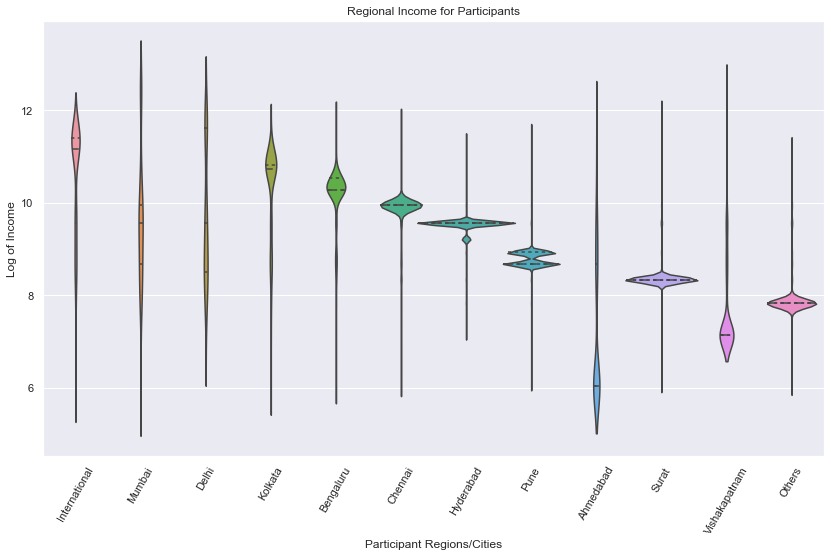

In [32]:
# your code here
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.violinplot(x=sm['city'],y=sm['logincome'], inner="quartile", width=1.5)
ax.set(xlabel='Participant Regions/Cities')
ax.set(ylabel='Log of Income')
ax.set_xticklabels(['International', 'Mumbai', 'Delhi', 'Kolkata', 'Bengaluru', 'Chennai', 'Hyderabad', 'Pune', 'Ahmedabad', 'Surat', 'Vishakapatnam', 'Others']) #can add ',rotation=n' here because I'm using xtick labels
plt.xticks(rotation=60)  # generic code using matplotlib to add text rotation w/o dependency on use of labels for xticklabels
ax.set_title('Regional Income for Participants')
plt.show();

**INTERPRETATION:**

**your answer here**
The mean incomes and income variances do differ by city. The ranges are somewhat similar. For example, the international cohort has a higher average income than Ahmendabad, but the ranges for the two are very close.  A review of the plot does reveal that the highest income levels--outside of international--are located in India's largest urban cities.  This is crucial as it reveals Indian demographics and supports the notion that participants living in urban centers have increased income levels.     

<div class='exercise-r'>  

**5.4** Is there a clear trend between BMI and income?

</div>

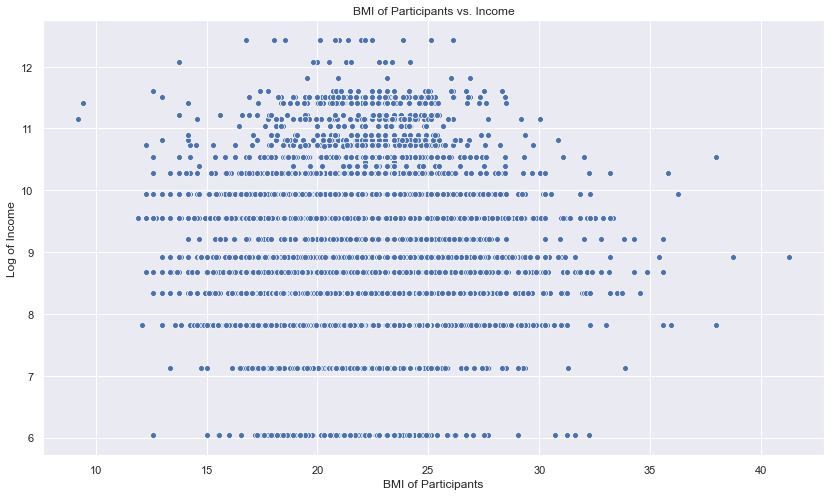

In [33]:
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.scatterplot(x=sm['bmi'],y=sm['logincome'])
ax.set(xlabel='BMI of Participants')
ax.set(ylabel='Log of Income')
ax.set_title('BMI of Participants vs. Income')
plt.show();

**INTERPRETATION:**

**your answer here**

There's no clear linear trend, however the people with BMI >=30 are only distributed in the lower income bands. There may be proportional differences in mean income across groupings/bands of BMI values

<div class='exercise-r'>  

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the gender variable available in this dataset?

</div>

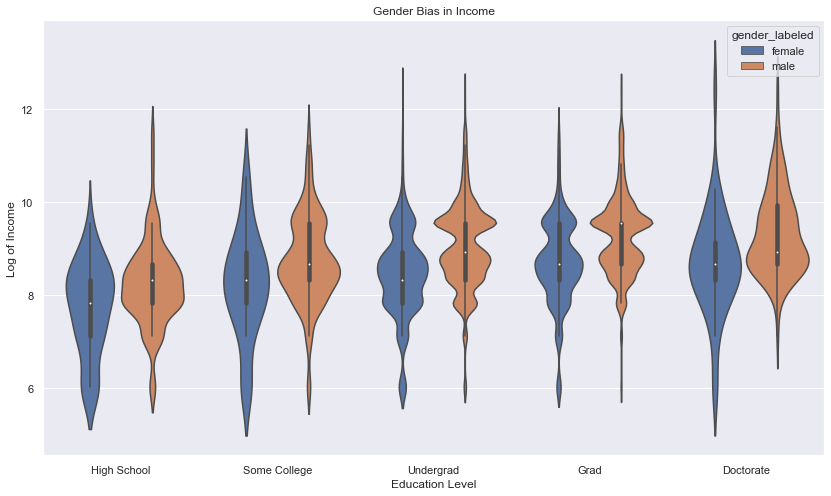

In [34]:
sm['gender_labeled'] = sm['gender'].map({1: 'male', 0: 'female'})
plt.figure(figsize=(14, 8))
g1 = sns.violinplot(x=sm['education'], y=sm['logincome'], hue=sm['gender_labeled'])
plt.ylabel=('income')
plt.xlabel=("education")
g1.set_title("Gender Bias in Income")
g1.set(xlabel="Education Level")
g1.set(ylabel='Log of Income')
g1.set_xticklabels(['High School','Some College','Undergrad','Grad','Doctorate'])
plt.show()

**INTERPRETATION:**

**your answer here** There is an upwards trend regarding income as individuals acquire an undergraduate education.  This positive trend seems to level off despite increased education at the graduate levels.   As for gender, there is a clear indication that males generally make more than females--at all levels except the graduate level where the incomes are more similar.  It is important to note that there is quite a disparity in income between males/females at the doctorate level, where males make substantially more.    

<div class='exercise-r'>  

**5.6** Do any of the quantitative attributes show a clear linear or non-linear association with income?

</div>

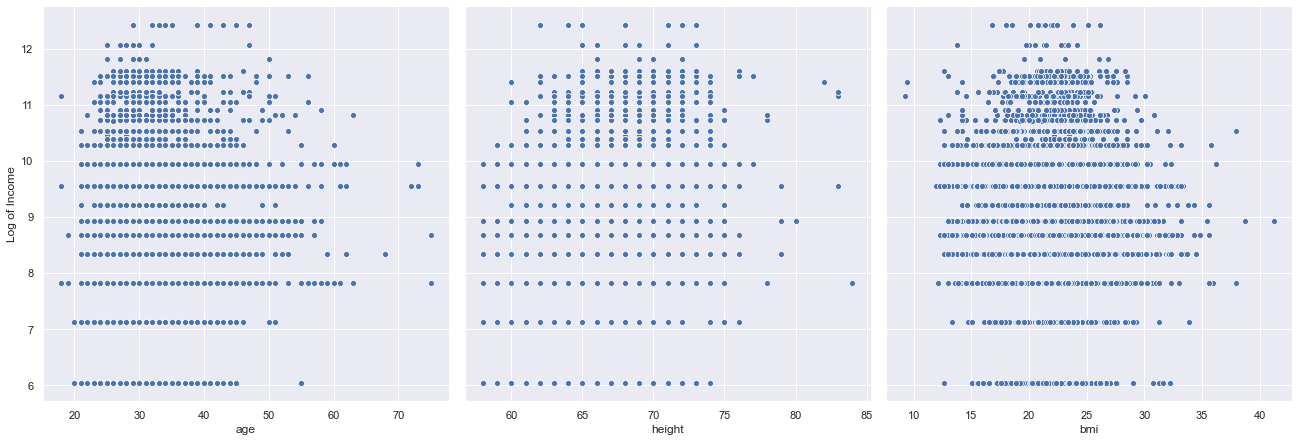

In [35]:
#Isolating quantitative variables vs. response variable for closer comparison  

corr2 = sns.pairplot(data=sm,
                  y_vars=['logincome'],
                  x_vars=['age', 'height', 'bmi'], height=6) 
corr2.set(ylabel='Log of Income')
plt.show();

**INTERPRETATION:**

**your answer here** There is no linear relationship between the quantitative variables and income.   The association is non-linear in nature, which suggests that a linear model will not be best for predictive purposes, i.e. to predict income.   


<div class='exercise-r'>  

**5.7** Is income lower or higher for those living in "nuclear" families?

</div>

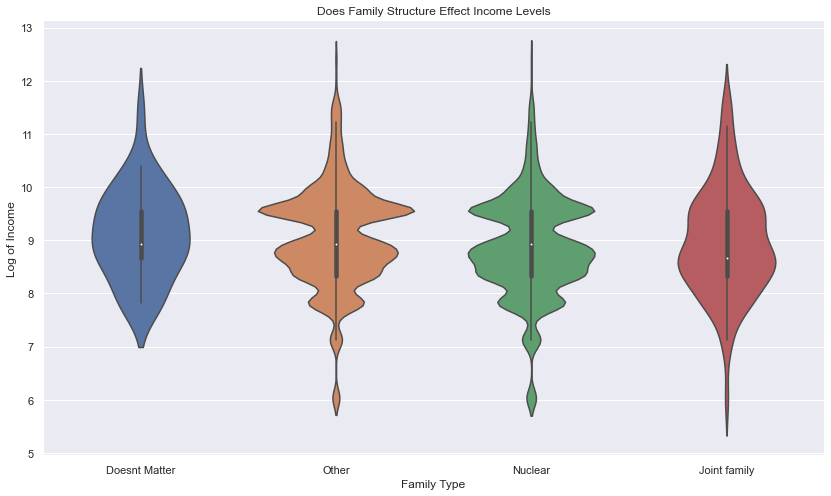

In [36]:
# your code here 
plt.figure(figsize=(14, 8))
g2 = sns.violinplot(x=sm["family_type"], y = sm['logincome'])
plt.ylabel=('income')
plt.xlabel=("family_type")
g2.set_title("Does Family Structure Effect Income Levels")
g2.set(xlabel="Family Type")
g2.set(ylabel='Log of Income')
g2.set_xticklabels(['Doesnt Matter','Other','Nuclear','Joint family'])

plt.show()

**INTERPRETATION:**

**your answer here** Income for those living in nuclear families is almost identical to those living in the "other" category.  Moreover, the incomes for "other," "nuclear," and "joint family" are very similar.  This would indicate that family_type does not have a strong affect on income levels.    

<div class='exercise-r'>  

**5.8** What is the average effect of the "Manglik" variable on income?

</div>

In [37]:
#Performing EDA to determine mean for various Manglik groups; income is in log format
newdf=sm.groupby(by=['manglik']).mean()
newdf.head()

,age,height,bmi,income,logincome
manglik,,,,,
0,30.395,66.969,21.999,13068.402,9.016
1,30.066,66.763,22.181,11899.045,8.944
2,31.505,66.815,22.466,11995.654,8.940


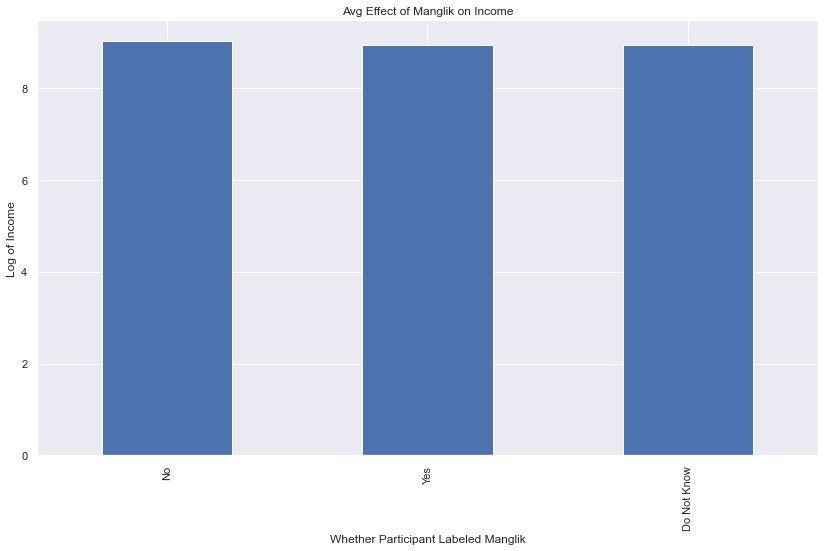

In [38]:
plt.figure(figsize=(14, 8))
g4 = sm.groupby('manglik')['logincome'].mean().plot(kind='bar') #taking mean of income that was already converted to log
g4.set_title("Avg Effect of Manglik on Income")
g4.set(xlabel="Whether Participant Labeled Manglik")
g4.set(ylabel='Log of Income')
g4.set_xticklabels(['No', 'Yes', 'Do Not Know'])


plt.show()


**INTERPRETATION:**

**your answer here** There is essentially no average affect of Manglik on income.  However, the only visible difference is that if you are NOT Manglik, then your income is only slightly higher than if Manglik or not known.  Otherwise, I would argue that there is no average affect of Manglik status on income.    

<a id="part6questions"></a>

## <div class='exercise'><b>Question 6:  Calculate the Gini coefficient [15 pts]</b></div>

[Return to contents](#contents)


**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, feel free to [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate and report the Gini coefficient for the income of the participants in our SimplyMarry.com dataset.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 6.1.

**6.2** Compare your Gini coefficient with Gini benchmark countries:

- According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is Ukraine, ranked 159th at $0.25$. India (i.e. SimplyMarry.com's primary user base) is ranked 95th on the list and has a Gini index of $0.357$.


- Based on your calculated Gini coefficient value for this dataset, what is your conclusion on the relationship of the income disparity of SimplyMarry.com's user base compared to the three countries listed above?


- Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?

## Question 6: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, feel free to [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate and report the Gini coefficient for the income of the participants in our SimplyMarry.com dataset.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 6.1.

</div>

In [42]:
# your code here
sm_sorted = sm.sort_values(by='income').copy(deep=True)
sm_sorted['gini_row_index'] = np.arange(len(sm_sorted))+1 # generates the ranks i for Gini calculation
income_sum = sm_sorted['income'].sum() * len(sm_sorted)
sm_sorted['gini_numerator_row'] = ((sm_sorted['gini_row_index']*2) - len(sm_sorted) -1) * sm_sorted['income']
gini_index = sm_sorted['gini_numerator_row'].sum() / income_sum
print(f"The Gini Index of the SimplyMarry.com dataset is{gini_index: .4f}")

The Gini Index of the SimplyMarry.com dataset is 0.4972


<div class='exercise-r'>  

**6.2** Compare your Gini coefficient with Gini benchmark countries:

- According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is Ukraine, ranked 159th at $0.25$. India (i.e. SimplyMarry.com's primary user base) is ranked 95th on the list and has a Gini index of $0.357$.


- Based on your calculated Gini coefficient value for this dataset, what is your conclusion on the relationship of the income disparity of SimplyMarry.com's user base compared to the three countries listed above?


- Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?

</div>

**your answer here**

The Gini Index of this dataset is higher than the general population of India (0.49 vs 0.36). This value would place them 16th on the list in it's current state. 

Multiple factors could explain this discrepancy. Some people, particularly those in middle income ranges, may overstate their income in order to appear more impressive, while the low and high income people tending to be more truthful. Another possible reason is people in middle income ranges have already found a partner and are not on the website (sampling).

<a id="part7questions"></a>

### <div class='exercise'><b>Question 7 (required for 209a students, optional for others): Multi-linear regression [10 pts]</b></div>

[Return to contents](#contents)

Now we increase the scope of our analysis to solve another problem that is related to income of our SimplyMarry.com users.


![](data/modi.png)

*Image Source: [The Economic Times](https://economictimes.indiatimes.com/news/politics-and-nation/you-can-run-but-cant-hide-modis-long-arm-reaches-out-for-tax-evaders/articleshow/62293002.cms)*

### Problem Description

Owing to a large number of people underreporting their income to evade taxes, as [reported by The Economic Times in 2017](https://economictimes.indiatimes.com/news/politics-and-nation/you-can-run-but-cant-hide-modis-long-arm-reaches-out-for-tax-evaders/articleshow/62293002.cms), the Income Tax Department of India wants you, an esteemed data scientist, to build a machine learning model that can predict the income of a given tax-payer based on information commonly available on SimplyMarry.com.

This will help the department flag suspected individuals who may show discernable trends of earing high values of income but are excessively under-reporting on their annual income.

The goal is to build the best model with the given SimplyMarry.com dataset, using both the categorical and quantitative predictors available in this dataset.

As with all other homework problems, this is a learning exercise. And, as absurd or problematic as it might seem to use SimplyMarry.com data for this purpose, in the real world, it will be your decision to choose the types of data science projects on which you will work as well as the clients with which you will work. 

### Deliverables

To accomplish this task, we will fit a multiple linear regression model to the training set.

Use the `sklearn` library. Your code should be contained in a Jupyter notebook cell.  An appropriate level of code comments are necessary.  Your code should run and output the required outputs described below.

### Required Outputs

- Fit a multiple linear regression model on the training set and predict on the train and test sets.
- Report the $MSE$ for the train and test set.
- Report the $R^2$ score on the test set.
- Make a plot of residuals vs. log of predicted values $\hat{y}$, with residuals on the $y$-axis and predicted values on the $x$-axis. Use the formula ${\epsilon} = y - \hat{y}$ to compute the residual values. Include a horizontal line denoting the zero residual value on the $y$-axis.
- Plot a histogram of the residuals values.
- Be certain to provide a written interpretation of your findings and any important aspects of your modeling approach of which you'd want the teaching staff to be aware, particularly if you attempt any optional outputs as mentioned below.

### Optional Outputs

You are encouraged to experiment with ways to improve your model *after first reporting results with only the required outputs*. Some ideas are given below:

- Polynomial terms for continous variables,
- Interaction terms between variables,
- Feature selection among given predictors.


## Question 7: Solutions 

[Return to contents](#contents)

In [40]:
# your code here


**INTERPRETATION:**

**your answer here**
